## Annual Averages

Let's now begin with plotting the annual averages per unit of latitude and longitude. First, we must load the data with xarray.

In [1]:
import xarray as xarr
import matplotlib.pyplot as plot
import cartopy.crs as ccrs
import cartopy.feature as cfea

# open datafile
dataFile = "./data/clipped_monthly_pressure_1988.nc"
data = xarr.open_dataset(dataFile)

# Kelvin -> Celsius
data["t_celsius"] = data['t'] - 273.15

Then, we can process and calculate the means, both across the nation and as a time series.

In [2]:
# calculate averages across continental US
mean_temp = data['t_celsius'].mean(dim='valid_time')
mean_clwc = data['clwc'].mean(dim='valid_time')

# calculate nationwide average across the year
temp_timeseries = data['t_celsius'].mean(dim=['latitude', 'longitude'])
clwc_timeseries = data['clwc'].mean(dim=['latitude', 'longitude'])

Finally, we can plot the annual average temperature across the continental United States.

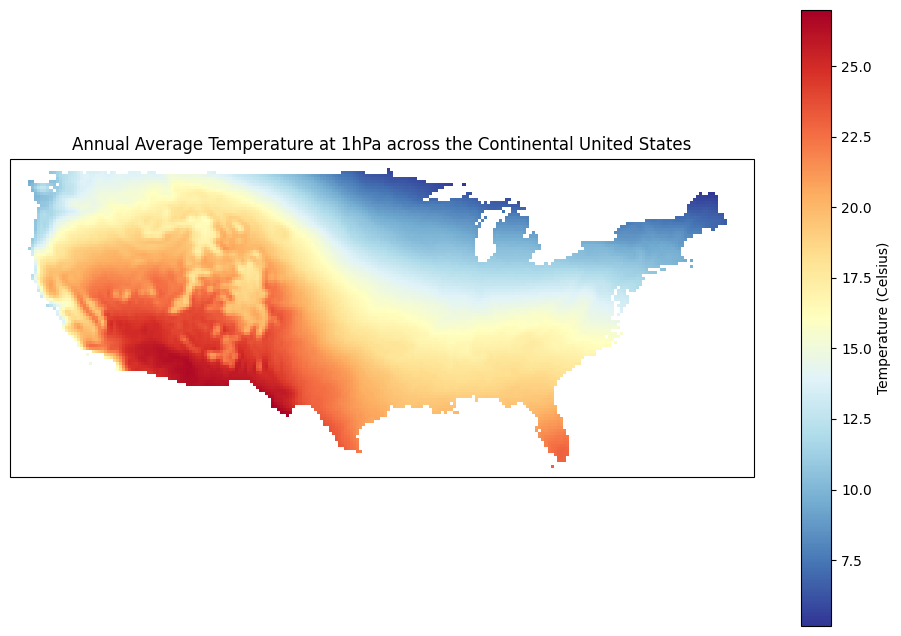

In [3]:
# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
temp_plot = mean_temp.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", add_colorbar=True)
temp_plot.colorbar.set_label("Temperature (Celsius)")

# plot, show
plot.title("Annual Average Temperature at 1hPa across the Continental United States")
plot.savefig("./plots/Annual_Average_Temperature_1hPa_CONUS_1988.png")
plot.show()

Now, let's do the same for average cloud water content.

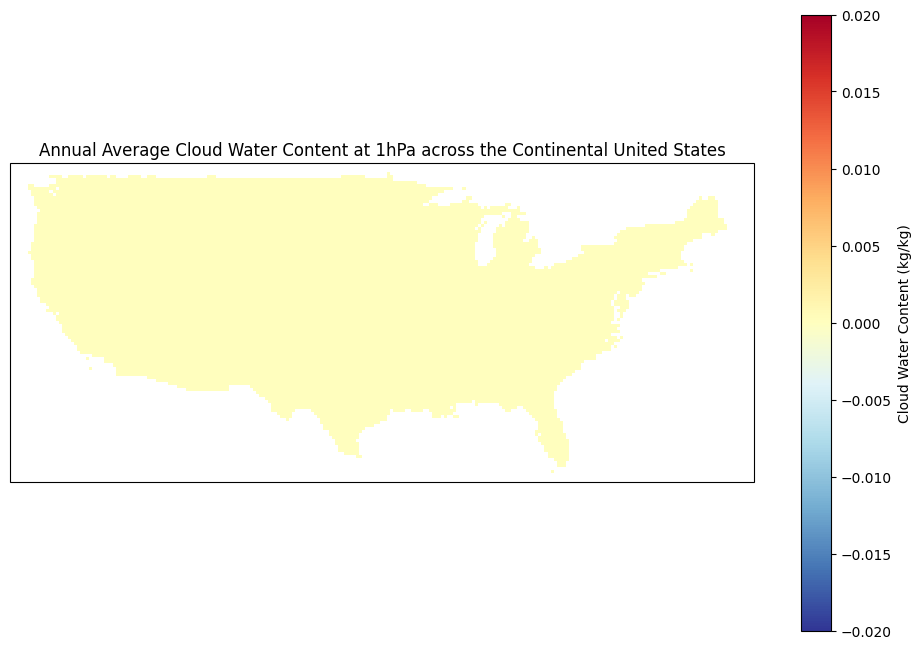

In [4]:
# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
clwc_plot = mean_clwc.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", vmin=-0.02, vmax=0.02, add_colorbar=True)
clwc_plot.colorbar.set_label("Cloud Water Content (kg/kg)")

# plot, show
plot.title("Annual Average Cloud Water Content at 1hPa across the Continental United States")
plot.savefig("./plots/Annual_Average_CLWC_1hPa_CONUS_1988.png")
plot.show()

(The altitude at which the pressure is 1hPa is so extreme that there is essentially zero cloud water content; hence, the near-uniform graph.)

Let's now plot the annual average across the entire continental United States with a graph that shows how temperature changes with time.

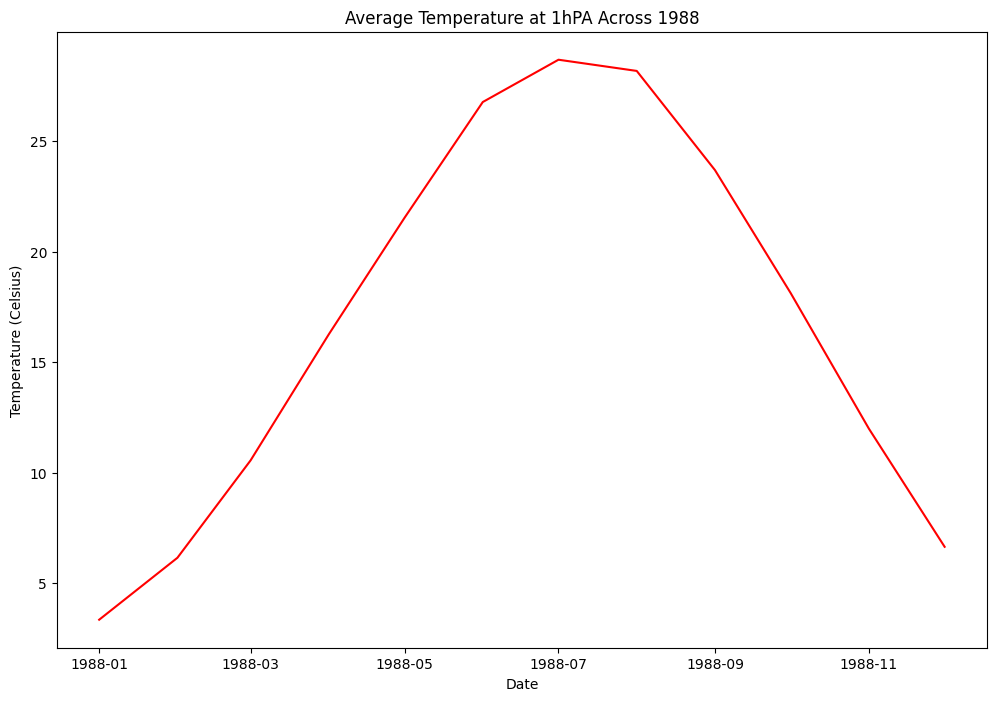

In [5]:
# create figure
theFigure = plot.subplots(figsize=(12,8))

# need to pass in the times, and then the data
plot.plot(temp_timeseries.valid_time, temp_timeseries, color="red")

# labels
plot.ylabel('Temperature (Celsius)')
plot.xlabel("Date")
plot.title("Average Temperature at 1hPA Across 1988")
plot.savefig("./plots/Annual_Average_Temperature_1hPa_TimeSeries_CONUS_1988.png")
plot.show()

Finally, we can then do the same for CLWC.

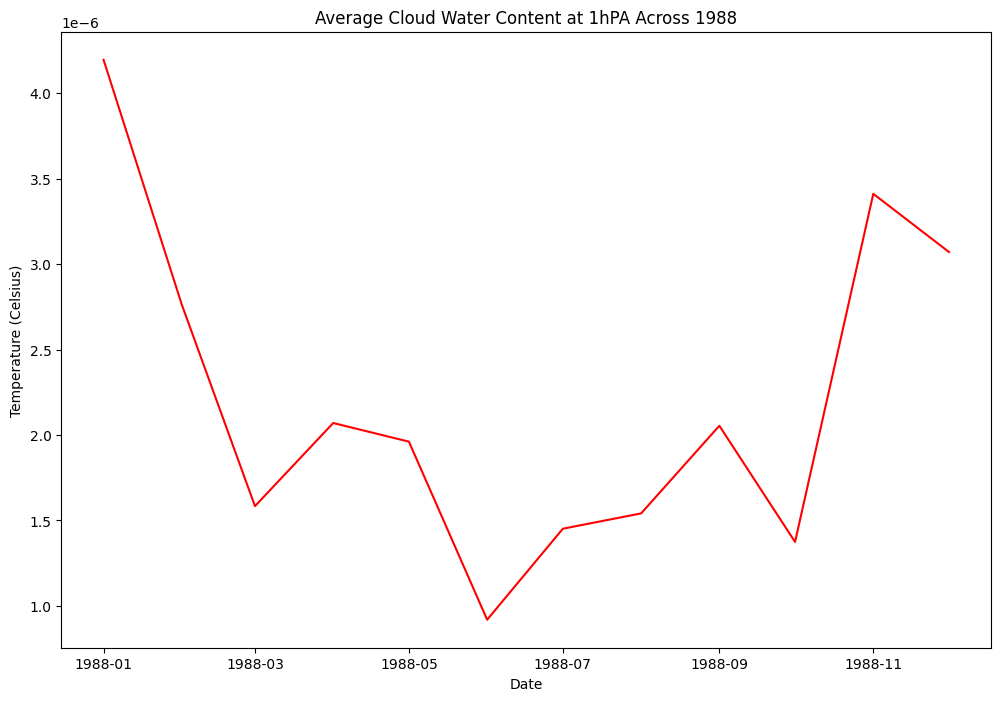

In [ ]:
theFigure = plot.subplots(figsize=(12,8))
plot.plot(clwc_timeseries.valid_time, clwc_timeseries, color="red")
plot.ylabel("Cloud Water Content (kg/kg)")
plot.xlabel("Date")
plot.title("Average Cloud Water Content at 1hPA Across 1988")
plot.savefig("./plots/Annual_Average_CLWC_1hPa_TimeSeries_CONUS_1988.png")
plot.show()